## 03. Naver Movie Ranking

### 1. 네이버 영화 평점 사이트 분석
- 영화랭킹에서 평점순(현재상형영화) 선택
- https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210929
- 원하는 정보를 얻기 위해서 변화시켜줘야 하는 주소의 규칙을 찾을 수 있음.
- 여기에서는 날짜 정보를 변경해주면 해당 날짜로 페이지 접근이 가능함.

In [1]:
import pandas as pd 
from urllib.request import urlopen 
from bs4 import BeautifulSoup

In [2]:
url ='https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210929'
response = urlopen(url)
soup = BeautifulSoup(response, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
   <meta content="네이버영화 " property="me2:post_tag">
    <meta content="네이버영화" property="me2:category1"/>
    <meta content="" property="me2:category2"/>
    <meta content="랭킹 : 네이버 영화" property="og:title"/>
    <meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
    <meta content="article" property="og:type"/>
    <meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20210929" property="og:url"/>
    <meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/>
    <!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
    <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
    <me

In [3]:
# 영화 제목 태그 ★
soup.find_all('div', 'tit5')[0].a.string
# soup.select('.tit5')[0].find('a').text
# soup.select('.tit5')[0].select_one('a').get_text()

'밥정'

In [4]:
# 영화 평점 태그
soup.select('td.point')[46].text

'6.51'

In [5]:
 # 영화제목 리스트
 # movie_name = [soup.select('.tit5')[n].a.text for n in range(0,end)]

 end = len(soup.find_all('div', 'tit5'))
 
 movie_name = []

 for n in range(0, end):
     movie_name.append(soup.find_all('div', 'tit5')[n].a.text)

movie_name

['밥정',
 '원더',
 '코다',
 '해리 포터와 마법사의 돌',
 '기적',
 '부활: 그 증거',
 '러빙 빈센트',
 '해피 투게더',
 '톰보이',
 '꽃다발 같은 사랑을 했다',
 '여름날 우리',
 '윤희에게',
 '남매의 여름밤',
 '이별의 아침에 약속의 꽃을 장식하자',
 '중경삼림',
 '너의 이름은.',
 '위플래쉬',
 '부에나 비스타 소셜 클럽',
 '화양연화',
 '취화선',
 '세자매',
 '캡틴 판타스틱',
 '보이스',
 '노매드랜드',
 '블랙 위도우',
 '아비정전',
 '링',
 '레토',
 '너의 췌장을 먹고 싶어',
 '모가디슈',
 '신은 죽지 않았다 3: 어둠 속의 빛',
 '메기',
 '우리의 20세기',
 '언어의 정원',
 '하나와 앨리스',
 '너의 췌장을 먹고 싶어',
 '날씨의 아이',
 '맨 인 더 다크 2 ',
 '007 노 타임 투 다이',
 '예수는 역사다',
 '그린 나이트',
 '호우시절',
 '인질',
 '말리그넌트',
 '샹치와 텐 링즈의 전설',
 '싱크홀',
 '쏘아올린 불꽃, 밑에서 볼까? 옆에서 볼까?']

In [6]:
# 영화 평점 리스트 
end = len(soup.find_all('td', 'point'))
 
movie_point = []

for n in range(0, end):
     movie_point.append(soup.find_all('td', 'point')[n].text)

movie_point

['9.63',
 '9.53',
 '9.35',
 '9.35',
 '9.29',
 '9.24',
 '9.22',
 '9.19',
 '9.17',
 '9.11',
 '9.00',
 '8.96',
 '8.93',
 '8.92',
 '8.91',
 '8.80',
 '8.80',
 '8.78',
 '8.77',
 '8.72',
 '8.61',
 '8.59',
 '8.54',
 '8.47',
 '8.47',
 '8.46',
 '8.44',
 '8.43',
 '8.40',
 '8.35',
 '8.30',
 '8.29',
 '8.25',
 '8.17',
 '8.11',
 '8.10',
 '7.96',
 '7.93',
 '7.89',
 '7.77',
 '7.49',
 '7.40',
 '7.33',
 '7.25',
 '6.59',
 '6.55',
 '6.51']

In [7]:
# 전체 데이터 수 확인
len(movie_name), len(movie_point)

(47, 47)

## 2. 자동화를 위한 코드

```
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210929

```
- 날짜만 변경하면 우리가 원하는 기간 만큼의 데이터를 얻을 수 있음

In [8]:
date = pd.date_range('2021.01.01', periods=100, freq='D')
date

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
      

In [9]:
date[0]

Timestamp('2021-01-01 00:00:00', freq='D')

In [10]:
date[0].strftime('%Y-%m-%d')

'2021-01-01'

In [11]:
date[0].strftime('%Y.%m.%d')

'2021.01.01'

In [12]:
# 문자열 format

name_string = 'hi, im {name}'
name_string.format(name='youngssun')


'hi, im youngssun'

In [13]:
import time
from tqdm import tqdm

movie_date = []
movie_name = []
movie_point = []

for today in tqdm(date):
    url ='https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date={date}'
    response = urlopen(url.format(date=today.strftime('%Y%m%d')))
    soup = BeautifulSoup(response, 'html.parser')

    end=len(soup.find_all('td', 'point'))

    movie_date.extend([today for _ in range(0, end)])
    movie_name.extend([soup.find_all('div','tit5')[n].find('a').text for n in range(0,end)])
    movie_point.extend([soup.find_all('td','point')[n].text for n in range(0,end)])

    time.sleep(0.5)


    


100%|██████████| 100/100 [03:40<00:00,  2.20s/it]


In [14]:
movie = pd.DataFrame({
    'date' : movie_date,
    'name' : movie_name,
    'point' : movie_point

})
movie.head()

,date,name,point
0,2021-01-01,가나의 혼인잔치: 언약,9.59
1,2021-01-01,언플랜드,9.52
2,2021-01-01,극장판 바이올렛 에버가든,9.49
3,2021-01-01,부활: 그 증거,9.40
4,2021-01-01,소년시절의 너,9.39


In [15]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4793 entries, 0 to 4792
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4793 non-null   datetime64[ns]
 1   name    4793 non-null   object        
 2   point   4793 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 112.5+ KB


In [16]:
# movie['point'].astype(float)  | 평점 컬럼(object) -> float 타입으로 바꾸기

In [17]:
movie['point'] = movie['point'].astype(float)

In [18]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4793 entries, 0 to 4792
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4793 non-null   datetime64[ns]
 1   name    4793 non-null   object        
 2   point   4793 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 112.5+ KB


In [19]:
# 데이터 저장
movie.to_csv('../data/03. naver_movie_data.csv', sep=',', encoding='utf-8')

In [20]:
movie = pd.read_csv('../data/03. naver_movie_data.csv', index_col=0)
movie.head()

,date,name,point
0,2021-01-01,가나의 혼인잔치: 언약,9.59
1,2021-01-01,언플랜드,9.52
2,2021-01-01,극장판 바이올렛 에버가든,9.49
3,2021-01-01,부활: 그 증거,9.40
4,2021-01-01,소년시절의 너,9.39


## 3. 영화 평점 데이터 정리

- 영화 이름으로 인덱스 잡기
- 점수의 합산 구하기
- 100일 간 네이버 영화 평점 합산 기준 베스트&워스트 10 선정



In [21]:
# pivot table
import numpy as np
movie_unique = pd.pivot_table(data=movie, index='name', aggfunc=np.sum)
movie_unique.head()

,point
name,
120BPM,2.76
1917,62.09
800,25.27
가나의 혼인잔치: 언약,501.68
건축학개론,78.03


In [22]:
movie_best = movie_unique.sort_values('point', ascending=False)
movie_best.head(10)

,point
name,
너의 췌장을 먹고 싶어,959.59
극장판 바이올렛 에버가든,949.98
부활: 그 증거,936.44
러브 액츄얼리,893.02
화양연화,877.12
타오르는 여인의 초상,833.51
너의 이름은.,817.40
아비정전,814.83
찬실이는 복도 많지,785.58


In [23]:
tmp = movie.query("name == ['화양연화']")   #★
tmp

,date,name,point
22,2021-01-01,화양연화,8.80
70,2021-01-02,화양연화,8.79
117,2021-01-03,화양연화,8.75
162,2021-01-04,화양연화,8.76
205,2021-01-05,화양연화,8.76
...,...,...,...
4571,2021-04-06,화양연화,8.79
4621,2021-04-07,화양연화,8.79
4668,2021-04-08,화양연화,8.79
4719,2021-04-09,화양연화,8.79


In [24]:
# 시각화

import matplotlib.pyplot as plt
from matplotlib import rc
 

plt.rcParams['axes.unicode_minus']=False
rc('font', family='Malgun Gothic')
get_ipython().run_line_magic('matplotlib', 'inline')

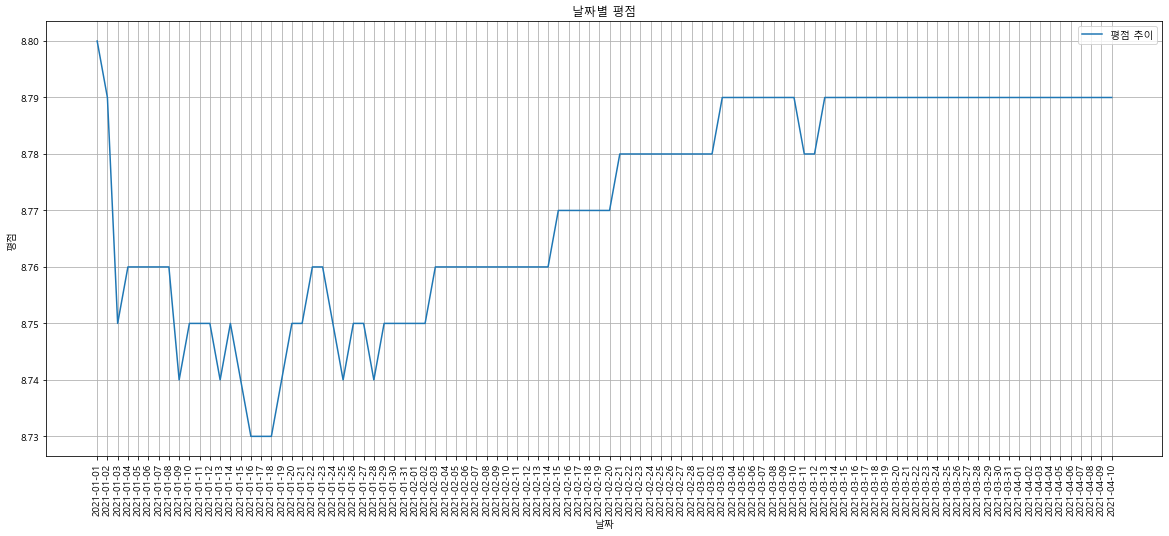

In [25]:
plt.figure(figsize=(20,8))
plt.plot(tmp['date'], tmp['point']) #날짜에 따른 평점 변화를 선그래프로 표현
plt.title('날짜별 평점')
plt.xlabel('날짜')
plt.ylabel('평점')
plt.xticks(rotation='vertical')  # x축 값이름 위치 변경
plt.legend(labels=['평점 추이'], loc='best')
plt.grid()
plt.show()


In [26]:
# 영화 하위 10개
movie_best.tail(10)

,point
name,
최악의 하루,23.40
열혈남아,23.16
영웅본색,18.36
너는 여기에 없었다,15.64
협상,14.64
고질라,13.34
초미의 관심사,7.37
레이니 데이 인 뉴욕,5.54
신 고질라,4.97


In [28]:
movie_pivot = pd.pivot_table(data=movie, index='date', columns='name', values='point')
movie_pivot.head()

name,120BPM,1917,800,가나의 혼인잔치: 언약,건축학개론,고질라,고질라 VS. 콩,국가부도의 날,굿바이,귀여운 여인,...,피아노,피아니스트의 전설,하나와 앨리스,해리 포터와 불의 잔,해리가 샐리를 만났을 때,해피 투게더,허트 로커,현기증,협상,화양연화
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,NaN,NaN,3.60,9.59,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.89,NaN,NaN,NaN,NaN,8.80
2021-01-02,NaN,NaN,3.60,9.56,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.89,NaN,NaN,NaN,NaN,8.79
2021-01-03,NaN,NaN,3.60,9.54,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.88,NaN,NaN,NaN,NaN,8.75
2021-01-04,NaN,NaN,3.61,9.51,NaN,NaN,NaN,NaN,9.04,8.7,...,NaN,NaN,8.11,NaN,8.88,NaN,NaN,NaN,NaN,8.76
2021-01-05,NaN,NaN,3.62,9.52,NaN,NaN,NaN,NaN,9.04,NaN,...,NaN,NaN,NaN,NaN,8.88,NaN,NaN,NaN,NaN,8.76


In [29]:
movie_pivot.to_excel('../data/03. movie_pivot.xlsx')

In [30]:
# 다중 컬럼 삭제
# movie_pivot.columns = movie_pivot.columns.droplevel()

In [33]:
import platform
import seaborn as sns
from matplotlib import font_manager, rc

path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font', family='Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')


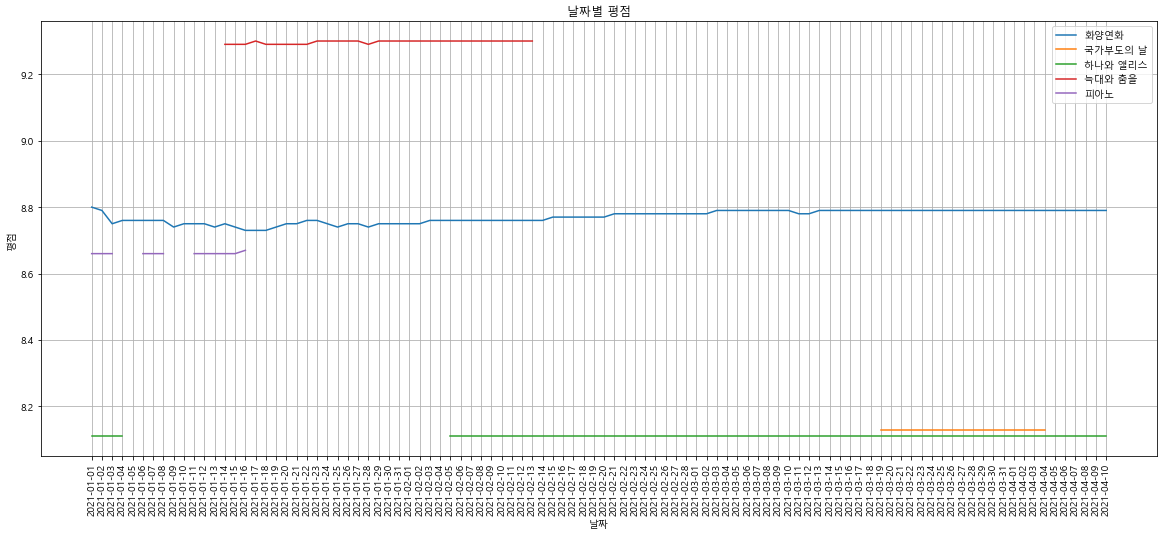

In [37]:
target_col = ['화양연화', '국가부도의 날', '하나와 앨리스', '늑대와 춤을', '피아노']
plt.figure(figsize=(20,8))
plt.title('날짜별 평점')
plt.xlabel('날짜')
plt.xticks(rotation='vertical')
plt.tick_params(bottom='off', labelbottom='off')  # x축 값 선 확실하게 보여줌
plt.ylabel('평점')
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()
